# Investigate a Dataset (TMDb Movie Data)
> The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This contain four parts:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Introduction
TMDb movies data set ,This data set contains information about 10 thousand movies Overview including user ratings and revenue. It Contains 21 columns with 10866 Rows, Dataset contain null values that we will handle in our process .

Questions that we will answer on this project :
first we will exploer our data by showing :

1. Number of Movies per year
2. Movies which had highst and lowest profit
3. Top 10 movies which earn highest profit?
4. Most profitable year 
5. Highlist relaesd Genres

In [67]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in the variable "Data"
Data = pd.read_csv('tmdb-movies.csv')
Data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>**Observation From The Dataset**

1. No unit of currency in the dataset. So for my analysis I will take it as dollar as it is the most used international currency.

2. vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count

### Data Cleaning 
1. Removing movies in the database have zero budget or zero revenue .
2. Removing the duplicacy in the rows from the dataset.
3. removing unused columns 
4. Changing release date column into date format.
5. Changing format of budget and revenue column.

1. Removing movies in the database have zero budget or zero revenue .

In [4]:
# Checking for any zero values in the budget or revenue columns
print("Zero Budget:",Data[(Data['budget']==0)].shape[0])
print("Zero Revenue :",Data[(Data['revenue']==0)].shape[0])

Zero Budget: 5696
Zero Revenue : 6016


In [5]:
# creating a temp list fro revenue and budget column
temp_list=['budget', 'revenue']

# replace o values to NAN in the list
Data[temp_list] = Data[temp_list].replace(0, np.NAN)

#Removing rows with NaN value in temp_list 
Data.dropna(subset = temp_list, inplace = True)

rows, col = Data.shape
print('after removing NAN we now have {} no.of movies.'.format(rows-1))

after removing NAN we now have 3854 no.of movies.


**2. Removing the duplicacy in the rows from the dataset.**

In [6]:
# counting the duplicate
sum(Data.duplicated())

#drop these row using 'drop_duplicates()' function
Data.drop_duplicates(inplace = True)
#show resulet
print("count data after Removing Duplicate Values (Rows,Columns) : ",Data.shape)


count data after Removing Duplicate Values (Rows,Columns) :  (3854, 21)


In [12]:
#count total rows in each column which contain null values if any
Data.isna().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       4
homepage                2428
director                   1
tagline                  280
keywords                 138
overview                   0
runtime                    0
genres                     0
production_companies      46
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

3. removing unused columns 

In [7]:
delete =['imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average']

#deleting the columns
Data= Data.drop(delete,1)

#previewing the new dataset
Data.head(4)

C:\Users\EBRAM~1.SIF\AppData\Local\Temp/ipykernel_9960/53207307.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Data= Data.drop(delete,1)


,id,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,135397,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,76341,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,262500,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,140607,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015


**4. Changing Format Of Release Date Into Datetime Format**

In [8]:
# change Dates in datetime format
Data['release_date'] = pd.to_datetime(Data['release_date'])
Data['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**5. Changing format of budget and revenue column.**

In [9]:
change_type=['budget', 'revenue']
#changing data type
Data[change_type]=Data[change_type].applymap(np.int64)
#printing the changed information
Data.dtypes

id                               int64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Number of movies each Year )

release_year
2011    199
2012    158
2013    180
2014    165
2015    160
Name: id, dtype: int64


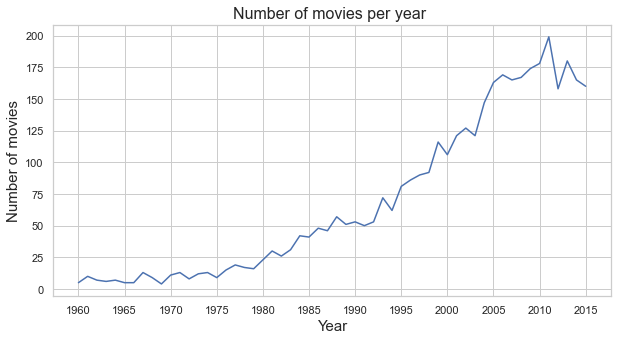

In [13]:
# make group for each year and count the number of movies in each year 
data=Data.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
Data.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Number of movies per year ",fontsize = 16)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Number of movies',fontsize = 15)
#set the style sheet
sns.set_style("whitegrid")

### Movies which had highst and lowest profit

In [31]:
#calculate Profit for each of the movie
Data['Profit'] = Data['revenue'] - Data['budget']

In [34]:
#Create function
def find_minmax(x):
    #lowest profit movie.
    min_index = Data[x].idxmin()
    #Highest profit movie.
    high_index = Data[x].idxmax()
    high = pd.DataFrame(Data.loc[high_index,:])
    low = pd.DataFrame(Data.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Highest "+ x + " : ",Data['original_title'][high_index])
    print("Lowest "+ x + "  : ",Data['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#callfunction.
find_minmax('Profit')

Highest Profit :  Avatar
Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


### top 10 movies highest profit

Text(0.5, 0, 'Profit')

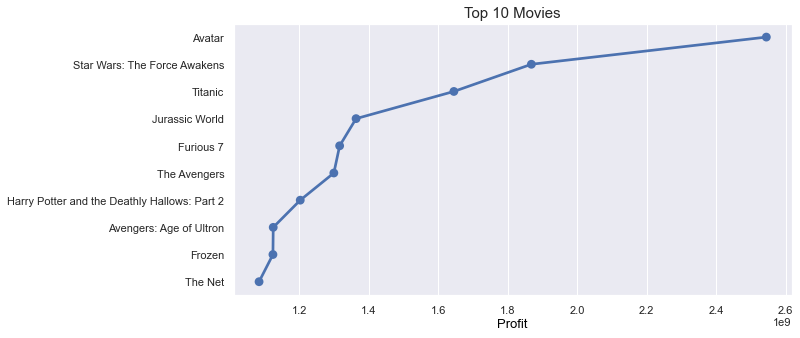

In [50]:
# top 10 movies which earn highest profit.

info = pd.DataFrame(Data['Profit'].sort_values(ascending = False))
info['original_title'] = Data['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Movies",fontsize = 15)
ax.set_xlabel("Profit", color = 'black', fontsize = '13')

In [ ]:
we can see that Avatar has the higst profit and next one also Star Wars both are science fiction movies

**4. Year of release vs Profitability**

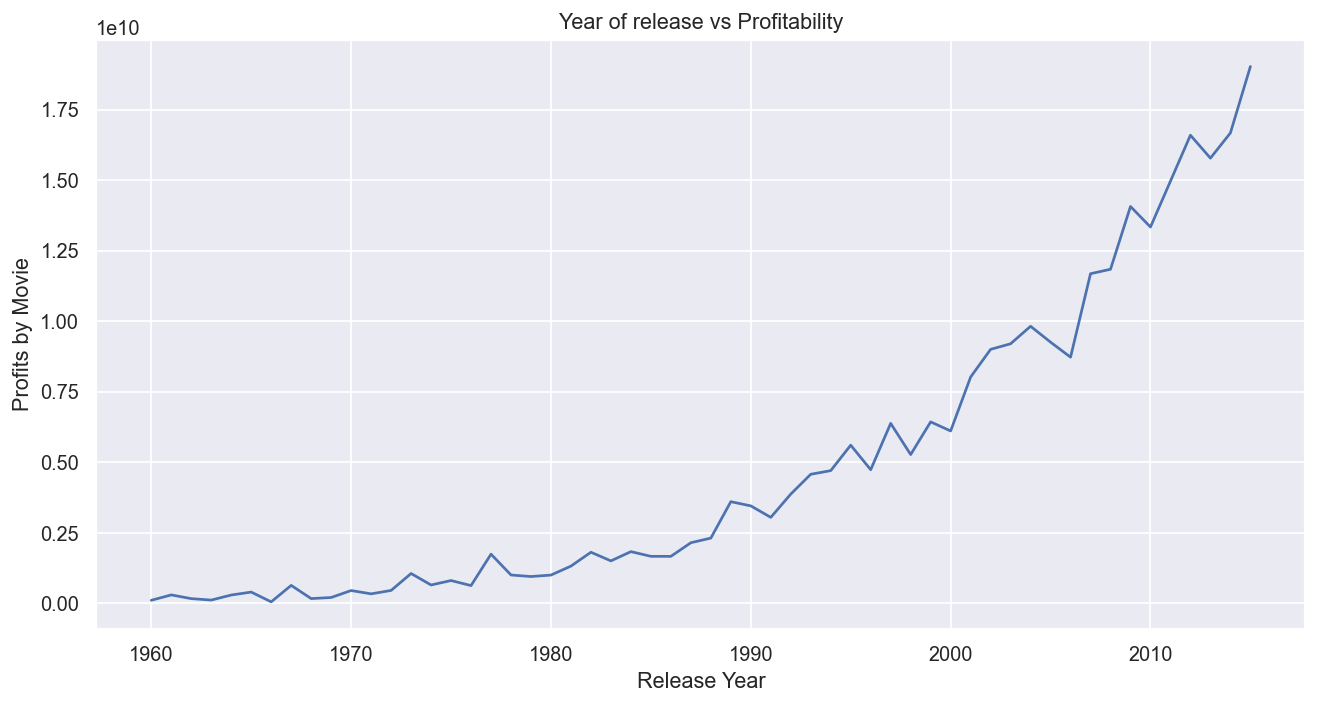

In [52]:
#We will use Line plot for this analysis
profits_year = Data.groupby('release_year')['Profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year', fontsize = 12)
#on y-axis
plt.ylabel('Profits by Movie', fontsize = 12)
#title of the line plot
plt.title('Year of release vs Profitability')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [ ]:
we can see that the MOst Profitble Year Was 2011 .

In [62]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

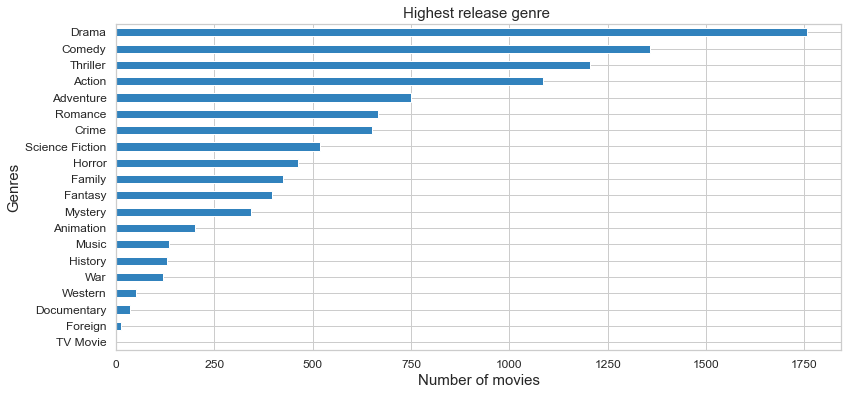

In [66]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    data_plot = Data[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=True)
    return info

#call  function 
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Highest release genre ",fontsize=15)
plt.xlabel('Number of movies',fontsize=15)
plt.ylabel("Genres",fontsize= 15)
sns.set_style("whitegrid")

In [ ]:
--we can see that the Highest release genre is the Drama then Comedy and the lowest is the TV Moveis--

<a id='conclusions'></a>
## Conclusions

> 
- Maximum Number  Of Movies Release In year 2011.
- 'Avatar' then 'Star Wars' then 'Titanic' are the most profitable movies.
- Drame, Comedy, Thriller and Action are four most-made genres. 
- Max profit year is 2015 

## limitations

I found that Drama is the most genre relesed moves  however science fiction movies "Avatar"  was the most profetble movie.
I wanted to know most profetble movies so I found that the most profetble movies is not that most relesed as it should.